In [1]:
#importing libraries 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import skbio
import skbio.diversity
import skbio.stats.composition
import scipy
import pylab as pl
import statsmodels.api as sm
# import statsmodels as sm
from statsmodels.formula.api import ols
from functools import reduce
from scipy import stats


from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import model_selection
from string import ascii_letters
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression



%matplotlib inline

import arivale_data_interface as adi
# apply settings so the lib knows where the data is
adi.apply_isb_config()

#list the local snapshots
local_snapshots = adi.list_local_snapshots()
print(len(local_snapshots))
local_snapshots[0]

# ignore deprecation warnings
import warnings
warnings.filterwarnings('ignore')

98


/users/epepper/miniconda3/envs/micom/lib/python3.7/site-packages/arivale_data_interface/snapshots_interface.py:31: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  DEPRECATIONS = yaml.load(in_yaml)


In [2]:
all_coeffs = pd.read_csv('hba1c_all_40_coefs.csv')
deltas_v_all = pd.read_csv('hba1c_v_ALL_BL_omics.csv')

all_features = all_coeffs['Unnamed: 0'].tolist()

# deltas_v_features = deltas_v_all[['public_client_id','A/G RATIO','ARACHIDONIC ACID','CHOLESTEROL, TOTAL','GFR, MDRD','GLOBULIN','INSULIN','OMEGA-6/OMEGA-3 RATIO','Purine Metabolism, (Hypo)Xanthine/Inosine containing, Nucleotide, hypoxanthine','Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cystine','Glycolysis, Gluconeogenesis, and Pyruvate Metabolism, Carbohydrate, pyruvate','Gamma-glutamyl Amino Acid, Peptide, gamma-glutamyltyrosine','Phospholipid Metabolism, Lipid, 1-myristoyl-2-palmitoyl-GPC (14:0/16:0)','Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate','Pyrimidine Metabolism, Uracil containing, Nucleotide, 5-methyluridine (ribothymidine)','Phenylalanine and Tyrosine Metabolism, Amino Acid, phenol sulfate','Lysolipid, Lipid, 2-myristoyl-GPC (14:0)*','Lysolipid, Lipid, 1-eicosapentaenoyl-GPC (20:5)*','Dipeptide, Peptide, cyclo(pro-val)','Sphingolipid Metabolism, Lipid, behenoyl sphingomyelin (d18:1/22:0)*','Sphingolipid Metabolism, Lipid, lignoceroyl sphingomyelin (d18:1/24:0)','Phospholipid Metabolism, Lipid, 1-palmitoyl-2-eicosapentaenoyl-GPC (16:0/20:5)*','Sphingolipid Metabolism, Lipid, sphingomyelin (d18:1/21:0, d17:1/22:0, d16:1/23:0)*','Sphingolipid Metabolism, Lipid, myristoyl dihydrosphingomyelin (d18:0/14:0)*','Phospholipid Metabolism, Lipid, 1-myristoyl-2-arachidonoyl-GPC (14:0/20:4)*','Phospholipid Metabolism, Lipid, 1-stearoyl-2-docosapentaenoyl-GPC (18:0/22:5n3)*','Plasmalogen, Lipid, 1-(1-enyl-stearoyl)-2-dihomo-linolenoyl-GPE (P-18:0/20:3)*','Phospholipid Metabolism, Lipid, 1-palmityl-2-palmitoyl-GPC (O-16:0/16:0)*','Polyamine Metabolism, Amino Acid, (N(1) + N(8))-acetylspermidine','Fatty Acid, Dicarboxylate, Lipid, 3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)**','Fatty Acid Metabolism (Acyl Carnitine, Monounsaturated), Lipid, undecenoylcarnitine (C11:1)','CVD2_Q76LX8','CVD2_Q8NEV9,Q14213','CVD2_Q99075','CVD2_Q9UIB8','CVD3_O00175','CVD3_P02786','CVD3_Q07654','INF_O14625','INF_O43557','INF_P13232','INF_P55773','INF_P78423','INF_P80162','INF_Q07011','INF_Q14790','INF_Q9NYY1','diversity_shannon','observed_otus_30000','observed_otus_50000','CORTISOL_NOON','bacteria.firmicutes.clostridia.clostridiales.ruminococcaceae.oscillospira','bacteria.bacteroidetes.flavobacteriia.flavobacteriales.flavobacteriaceae.flavobacterium','bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae.blautia','bacteria.firmicutes.clostridia.clostridiales.clostridiaceae.clostridium','bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae.roseburia','bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae.ruminococcus','bacteria.cyanobacteria.4c0d-2.ys2.unclassified.unclassified','bacteria.firmicutes.clostridia.clostridiales.veillonellaceae.phascolarctobacterium','bacteria.tm7.tm7-3.ew055.unclassified.unclassified','bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae.shuttleworthia','bacteria.proteobacteria.gammaproteobacteria.aeromonadales.succinivibrionaceae.unclassified','bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae','bacteria.firmicutes.clostridia.clostridiales.ruminococcaceae','bacteria.actinobacteria.coriobacteriia.coriobacteriales.coriobacteriaceae','bacteria.firmicutes.bacilli.lactobacillales.aerococcaceae','bacteria.cyanobacteria.4c0d-2.ys2.unclassified','bacteria.tm7.tm7-3.ew055.unclassified','hba1c_Residuals']]

new_df=pd.DataFrame()
for x in all_features:
    new_df[x]=deltas_v_all[x]
new_df['hba1c_Residuals']=deltas_v_all['hba1c_Residuals']
new_df.set_index(deltas_v_all['public_client_id'],inplace=True)

new_df

,ARACHIDONIC ACID,CARBON DIOXIDE (CO2),"CHOLESTEROL, TOTAL","GFR, MDRD",INSULIN,OMEGA-6/OMEGA-3 RATIO,"Purine Metabolism, (Hypo)Xanthine/Inosine containing, Nucleotide, hypoxanthine","Glycolysis, Gluconeogenesis, and Pyruvate Metabolism, Carbohydrate, pyruvate","Gamma-glutamyl Amino Acid, Peptide, gamma-glutamyltyrosine","Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate",...,bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae.shuttleworthia,bacteria.proteobacteria.gammaproteobacteria.aeromonadales.succinivibrionaceae.unclassified,bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae,bacteria.firmicutes.clostridia.clostridiales.ruminococcaceae,bacteria.actinobacteria.coriobacteriia.coriobacteriales.coriobacteriaceae,bacteria.firmicutes.bacilli.lactobacillales.aerococcaceae,bacteria.cyanobacteria.4c0d-2.ys2.unclassified,bacteria.cyanobacteria.chloroplast.streptophyta.unclassified,bacteria.tm7.tm7-3.ew055.unclassified,hba1c_Residuals
public_client_id,,,,,,,,,,,,,,,,,,,,,
1044249,9.8,22.0,183.0,105.0,13.4,10.3,1.871249,1.082681,0.966755,0.620794,...,0.000000,0.0,0.212165,0.311373,0.030219,0.0,0.005320,0.000011,0.0,-0.305688
1045282,7.3,24.0,188.0,86.0,6.0,12.3,2.361405,1.709739,0.884308,4.762128,...,0.000000,0.0,0.294676,0.258707,0.005529,0.0,0.000100,0.000000,0.0,-0.106244
1054574,10.4,22.0,175.0,75.0,5.0,7.3,0.744027,1.572209,1.145491,4.333795,...,0.000000,0.0,0.351822,0.207614,0.007924,0.0,0.000380,0.000006,0.0,0.022194
1057221,9.2,22.0,251.0,81.0,6.8,10.8,2.939150,0.443290,0.977544,1.203741,...,0.000000,0.0,0.277811,0.333623,0.015183,0.0,0.000000,0.000039,0.0,-0.501933
1058050,0.3,22.0,201.0,68.0,12.0,5.4,1.156264,0.811552,1.567686,1.251420,...,0.000009,0.0,0.392157,0.286184,0.001416,0.0,0.000000,0.000009,0.0,1.390940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982074,11.5,21.0,196.0,77.0,15.5,8.6,1.217661,0.870681,0.653655,0.839221,...,0.000000,0.0,0.085663,0.185397,0.002640,0.0,0.000105,0.000000,0.0,2.591682
1982352,7.0,27.0,157.0,77.0,17.1,10.6,1.050696,0.957028,1.610746,1.098842,...,0.000000,0.0,0.257466,0.365409,0.002115,0.0,0.000188,0.000017,0.0,0.162129
1986408,10.0,25.0,201.0,98.0,6.8,11.3,1.434532,1.192093,0.596727,0.812638,...,0.000000,0.0,0.187075,0.387447,0.004186,0.0,0.000190,0.000172,0.0,0.162129


In [3]:
# loop through selected features from all omics and perform linear regression for each on against deltas

x = new_df[['hba1c_Residuals']]

r2 = []

for i in range(new_df.shape[1] - 2):
    model = LinearRegression().fit(x, new_df.iloc[:, i+1])
    score = model.score(x, new_df.iloc[:, i+1])
    
    r2.append(score)

uni_reg_all = pd.DataFrame()
features = list(new_df.columns.values)

features_series = pd.Series(features[1:len(features) - 1])
r2_series = pd.Series(r2)

uni_reg_all['feature'] = features_series.values
uni_reg_all['r2'] = r2_series.values

uni_reg_all = uni_reg_all.sort_values(by=['r2'], ascending=False)
uni_reg_all.to_csv('hba1c_top_features.csv')
uni_reg_all.head(n=10)

,feature,r2
41,observed_otus_50000,0.248226
8,"Methionine, Cysteine, SAM and Taurine Metaboli...",0.217169
31,CVD3_P02786,0.169913
32,INF_O14625,0.117861
43,bacteria.firmicutes.clostridia.clostridiales.c...,0.117561
28,CVD2_Q9UIB8,0.116158
52,bacteria.firmicutes.clostridia.clostridiales.l...,0.111476
33,INF_P13232,0.108869
36,INF_P80162,0.101190
4,OMEGA-6/OMEGA-3 RATIO,0.087839


In [4]:
#load in chemistries snapshot 
chemistries = adi.get_snapshot('chemistries')
chemistry_vendor = chemistries[['public_client_id', 'vendor', 'days_since_first_draw']]

chemistry_vendor

,public_client_id,vendor,days_since_first_draw
0,01000261,Quest,0
1,01000261,LCA,133
2,01001298,LCA,0
3,01001467,LCA,0
4,01001467,LCA,208
...,...,...,...
11162,ZU273983,LCA,0
11163,ZU612255,LCA,0
11164,ZU621944,LCA,0
11165,ZU621944,LCA,216


In [5]:
t0_chemistries = chemistry_vendor[chemistry_vendor['days_since_first_draw'].abs() <= 45]
# t0_chemistries = t0_chemistries.sort_values('days_since_first_draw').groupby('public_client_id').first()
t0_chemistries = t0_chemistries.rename(columns={'days_since_first_draw' : 't0', 'vendor' : 'vendor1'})
t0_chemistries['t0'] = np.where(t0_chemistries['t0'] <= 45, 0, t0_chemistries['t0'])
# t0_chemistries = t0_chemistries.reset_index()

print(type(t0_chemistries.index))
t0_chemistries

<class 'pandas.core.indexes.numeric.Int64Index'>


,public_client_id,vendor1,t0
0,01000261,Quest,0
2,01001298,LCA,0
3,01001467,LCA,0
5,01001548,LCA,0
6,01001621,LCA,0
...,...,...,...
11158,QIRL,LCA,0
11162,ZU273983,LCA,0
11163,ZU612255,LCA,0
11164,ZU621944,LCA,0


In [6]:
t1 = chemistry_vendor[chemistry_vendor['days_since_first_draw'].abs() <= 400]
t1_chemistries = t1[t1['days_since_first_draw'].abs() >= 180]
# t1_chemistries = t1_chemistries.sort_values('days_since_first_draw').groupby('public_client_id').first()
t1_chemistries = t1_chemistries.rename(columns={'days_since_first_draw' : 't1', 'vendor' : 'vendor2'})
t1_chemistries['t1'] = np.where(t1_chemistries['t1'] <= 400, 6, t1_chemistries['t1'])
# t1_chemistries = t1_chemistries.reset_index()

print(type(t1_chemistries.index))
t1_chemistries

<class 'pandas.core.indexes.numeric.Int64Index'>


,public_client_id,vendor2,t1
4,01001467,LCA,6
7,01001621,LCA,6
12,01002183,LCA,6
22,01002471,LCA,6
25,01002885,LCA,6
...,...,...,...
11148,HX981293,LCA,6
11156,MUMA,LCA,6
11159,QIRL,LCA,6
11160,QIRL,LCA,6


In [7]:
ALL_chemistries = pd.merge(t0_chemistries, t1_chemistries, how='inner', on='public_client_id')

print(type(ALL_chemistries.index))
ALL_chemistries

<class 'pandas.core.indexes.numeric.Int64Index'>


,public_client_id,vendor1,t0,vendor2,t1
0,01001467,LCA,0,LCA,6
1,01001621,LCA,0,LCA,6
2,01002183,Quest,0,LCA,6
3,01002471,LCA,0,LCA,6
4,01002885,LCA,0,LCA,6
...,...,...,...,...,...
3153,HX981293,LCA,0,LCA,6
3154,MUMA,LCA,0,LCA,6
3155,QIRL,LCA,0,LCA,6
3156,QIRL,LCA,0,LCA,6


In [8]:
vendor_change = np.where(ALL_chemistries['vendor1'] == ALL_chemistries['vendor2'], 0, 1)
ALL_chemistries['vendor_change'] = vendor_change

print(type(ALL_chemistries.index))
ALL_chemistries

<class 'pandas.core.indexes.numeric.Int64Index'>


,public_client_id,vendor1,t0,vendor2,t1,vendor_change
0,01001467,LCA,0,LCA,6,0
1,01001621,LCA,0,LCA,6,0
2,01002183,Quest,0,LCA,6,1
3,01002471,LCA,0,LCA,6,0
4,01002885,LCA,0,LCA,6,0
...,...,...,...,...,...,...
3153,HX981293,LCA,0,LCA,6,0
3154,MUMA,LCA,0,LCA,6,0
3155,QIRL,LCA,0,LCA,6,0
3156,QIRL,LCA,0,LCA,6,0


In [9]:
features = new_df.copy(deep=True)
# features = features.reset_index()

which_vendor = ALL_chemistries.copy(deep=True)
# which_vendor.to_csv('which_vendor.csv')
which_vendor['public_client_id'] = which_vendor['public_client_id'].astype(str)
# which_vendor['public_client_id'].dtype



which_vendor = which_vendor.iloc[:3069, :]
which_vendor


# which_vendor = which_vendor.set_index('public_client_id')
print(type(which_vendor.index))
which_vendor.to_csv('vendor_change.csv')
which_vendor

<class 'pandas.core.indexes.numeric.Int64Index'>


,public_client_id,vendor1,t0,vendor2,t1,vendor_change
0,01001467,LCA,0,LCA,6,0
1,01001621,LCA,0,LCA,6,0
2,01002183,Quest,0,LCA,6,1
3,01002471,LCA,0,LCA,6,0
4,01002885,LCA,0,LCA,6,0
...,...,...,...,...,...,...
3064,01997909,Quest,0,LCA,6,1
3065,01997940,LCA,0,LCA,6,0
3066,01998370,LCA,0,LCA,6,0
3067,01998999,LCA,0,LCA,6,0


In [10]:
features = features.reset_index()
features['public_client_id'] = features['public_client_id'].apply('{:0>8}'.format)

In [11]:
features['public_client_id'] = features['public_client_id'].astype('str')
print(features['public_client_id'].dtype)


print(type(features.index))
features

object
<class 'pandas.core.indexes.range.RangeIndex'>


,public_client_id,ARACHIDONIC ACID,CARBON DIOXIDE (CO2),"CHOLESTEROL, TOTAL","GFR, MDRD",INSULIN,OMEGA-6/OMEGA-3 RATIO,"Purine Metabolism, (Hypo)Xanthine/Inosine containing, Nucleotide, hypoxanthine","Glycolysis, Gluconeogenesis, and Pyruvate Metabolism, Carbohydrate, pyruvate","Gamma-glutamyl Amino Acid, Peptide, gamma-glutamyltyrosine",...,bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae.shuttleworthia,bacteria.proteobacteria.gammaproteobacteria.aeromonadales.succinivibrionaceae.unclassified,bacteria.firmicutes.clostridia.clostridiales.lachnospiraceae,bacteria.firmicutes.clostridia.clostridiales.ruminococcaceae,bacteria.actinobacteria.coriobacteriia.coriobacteriales.coriobacteriaceae,bacteria.firmicutes.bacilli.lactobacillales.aerococcaceae,bacteria.cyanobacteria.4c0d-2.ys2.unclassified,bacteria.cyanobacteria.chloroplast.streptophyta.unclassified,bacteria.tm7.tm7-3.ew055.unclassified,hba1c_Residuals
0,01044249,9.8,22.0,183.0,105.0,13.4,10.3,1.871249,1.082681,0.966755,...,0.000000,0.0,0.212165,0.311373,0.030219,0.0,0.005320,0.000011,0.0,-0.305688
1,01045282,7.3,24.0,188.0,86.0,6.0,12.3,2.361405,1.709739,0.884308,...,0.000000,0.0,0.294676,0.258707,0.005529,0.0,0.000100,0.000000,0.0,-0.106244
2,01054574,10.4,22.0,175.0,75.0,5.0,7.3,0.744027,1.572209,1.145491,...,0.000000,0.0,0.351822,0.207614,0.007924,0.0,0.000380,0.000006,0.0,0.022194
3,01057221,9.2,22.0,251.0,81.0,6.8,10.8,2.939150,0.443290,0.977544,...,0.000000,0.0,0.277811,0.333623,0.015183,0.0,0.000000,0.000039,0.0,-0.501933
4,01058050,0.3,22.0,201.0,68.0,12.0,5.4,1.156264,0.811552,1.567686,...,0.000009,0.0,0.392157,0.286184,0.001416,0.0,0.000000,0.000009,0.0,1.390940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,01982074,11.5,21.0,196.0,77.0,15.5,8.6,1.217661,0.870681,0.653655,...,0.000000,0.0,0.085663,0.185397,0.002640,0.0,0.000105,0.000000,0.0,2.591682
375,01982352,7.0,27.0,157.0,77.0,17.1,10.6,1.050696,0.957028,1.610746,...,0.000000,0.0,0.257466,0.365409,0.002115,0.0,0.000188,0.000017,0.0,0.162129
376,01986408,10.0,25.0,201.0,98.0,6.8,11.3,1.434532,1.192093,0.596727,...,0.000000,0.0,0.187075,0.387447,0.004186,0.0,0.000190,0.000172,0.0,0.162129
377,01994330,5.9,22.0,257.0,58.0,14.0,9.0,2.132448,1.506303,1.693029,...,0.000000,0.0,0.340870,0.204343,0.019966,0.0,0.000549,0.000000,0.0,0.683958


In [12]:
new_metadata = pd.merge(features, which_vendor, how='inner', on='public_client_id')
new_metadata = new_metadata.groupby('public_client_id').first()
new_metadata

,ARACHIDONIC ACID,CARBON DIOXIDE (CO2),"CHOLESTEROL, TOTAL","GFR, MDRD",INSULIN,OMEGA-6/OMEGA-3 RATIO,"Purine Metabolism, (Hypo)Xanthine/Inosine containing, Nucleotide, hypoxanthine","Glycolysis, Gluconeogenesis, and Pyruvate Metabolism, Carbohydrate, pyruvate","Gamma-glutamyl Amino Acid, Peptide, gamma-glutamyltyrosine","Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate",...,bacteria.firmicutes.bacilli.lactobacillales.aerococcaceae,bacteria.cyanobacteria.4c0d-2.ys2.unclassified,bacteria.cyanobacteria.chloroplast.streptophyta.unclassified,bacteria.tm7.tm7-3.ew055.unclassified,hba1c_Residuals,vendor1,t0,vendor2,t1,vendor_change
public_client_id,,,,,,,,,,,,,,,,,,,,,
01044249,9.8,22.0,183.0,105.0,13.4,10.3,1.871249,1.082681,0.966755,0.620794,...,0.0,0.005320,0.000011,0.0,-0.305688,LCA,0,LCA,6,0
01045282,7.3,24.0,188.0,86.0,6.0,12.3,2.361405,1.709739,0.884308,4.762128,...,0.0,0.000100,0.000000,0.0,-0.106244,Quest,0,LCA,6,1
01054574,10.4,22.0,175.0,75.0,5.0,7.3,0.744027,1.572209,1.145491,4.333795,...,0.0,0.000380,0.000006,0.0,0.022194,Quest,0,LCA,6,1
01057221,9.2,22.0,251.0,81.0,6.8,10.8,2.939150,0.443290,0.977544,1.203741,...,0.0,0.000000,0.000039,0.0,-0.501933,LCA,0,LCA,6,0
01058050,0.3,22.0,201.0,68.0,12.0,5.4,1.156264,0.811552,1.567686,1.251420,...,0.0,0.000000,0.000009,0.0,1.390940,Quest,0,LCA,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01982074,11.5,21.0,196.0,77.0,15.5,8.6,1.217661,0.870681,0.653655,0.839221,...,0.0,0.000105,0.000000,0.0,2.591682,LCA,0,LCA,6,0
01982352,7.0,27.0,157.0,77.0,17.1,10.6,1.050696,0.957028,1.610746,1.098842,...,0.0,0.000188,0.000017,0.0,0.162129,LCA,0,LCA,6,0
01986408,10.0,25.0,201.0,98.0,6.8,11.3,1.434532,1.192093,0.596727,0.812638,...,0.0,0.000190,0.000172,0.0,0.162129,LCA,0,LCA,6,0


<AxesSubplot:xlabel='vendor_change', ylabel='hba1c_Residuals'>

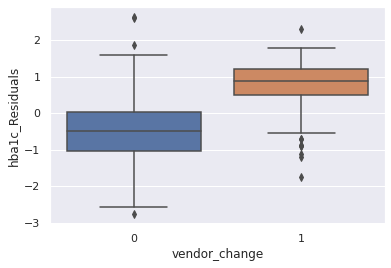

In [13]:
sns.boxplot(x='vendor_change', y='hba1c_Residuals', data=new_metadata)

In [14]:
import statsmodels.api as sm

# x = new_metadata['hba1c_Residuals'].to_numpy()
# x = np.array(x).reshape((-1,1))

x = new_metadata[['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate']]
y = new_metadata['hba1c_Residuals']

model_1 = LinearRegression().fit(x, y)
score1 = model_1.score(x, y)
print('r2 = ', score1, 'coef = ', model_1.coef_, 'intercept = ', model_1.intercept_)


x_cov = new_metadata[['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate', 'vendor_change']]

model_2 = LinearRegression().fit(x_cov, y)
score2 = model_2.score(x_cov, y)
print('r2 = ', score2, 'coef = ', model_2.coef_, 'intercept = ', model_2.intercept_)

r2 =  0.21716907088225046 coef =  [0.24027104] intercept =  -0.4579618227300472
r2 =  0.40126337020856107 coef =  [0.01348705 1.21291833] intercept =  -0.49168878684496325


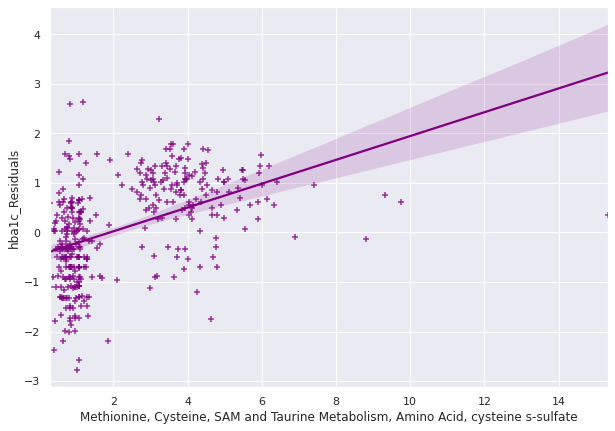

In [15]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=new_metadata['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate'], y=new_metadata['hba1c_Residuals'], color='purple', marker='+')
fig.savefig('cysteine_s-sulfate_v_hba1c_residuals.png')

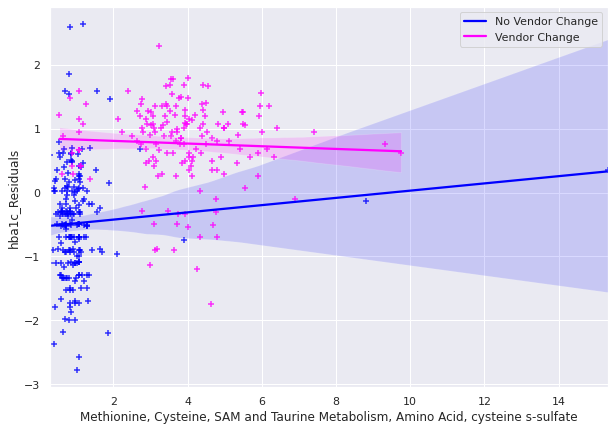

In [16]:
df_no_change = new_metadata[new_metadata['vendor_change'] == 0]
df_change = new_metadata[new_metadata['vendor_change'] == 1]

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_no_change['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate'], y=df_no_change['hba1c_Residuals'], color='blue', marker='+')
sns.regplot(x=df_change['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate'], y=df_change['hba1c_Residuals'], color='magenta', marker='+')
plt.legend(labels=['No Vendor Change', 'Vendor Change'])
fig.savefig('separated_cysteine_s-sulfate_v_hba1c_residuals.png')

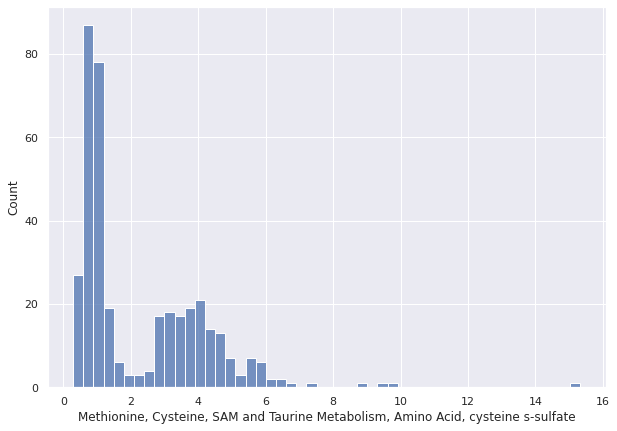

In [17]:
fig = plt.figure(figsize=(10, 7))
sns.histplot(new_metadata['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate'], bins=50)
fig.savefig('cysteine_s-sulfate_histplot.png')

In [18]:
import statsmodels.api as sm

# x = new_metadata['hba1c_Residuals'].to_numpy()
# x = np.array(x).reshape((-1,1))

dep = new_metadata[['hba1c_Residuals']]
indep = new_metadata['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate']

model_no_cov = sm.OLS(dep, indep)
results_no_cov = model_no_cov.fit()
print('params w/o vendor change =', results_no_cov.params, '\n', 't-values w/o cov =', results_no_cov.tvalues, '\n')


indep_cov = new_metadata[['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate', 'vendor_change']]

model_cov = sm.OLS(dep, indep_cov)
results_cov = model_cov.fit()
print('params w/ vendor change =', results_cov.params, '\n', 't-values w/ cov =', results_cov.tvalues)

params w/o vendor change = Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate    0.122028
dtype: float64 
 t-values w/o cov = Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate    7.678788
dtype: float64 

params w/ vendor change = Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate   -0.104446
vendor_change                                                                       1.166466
dtype: float64 
 t-values w/ cov = Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate   -3.781863
vendor_change                                                                       9.578151
dtype: float64


In [19]:
x = new_metadata[['vendor_change']]
y = new_metadata['hba1c_Residuals']

model_1 = LinearRegression().fit(x, y)
score1 = model_1.score(x, y)
print('r2 = ', score1, 'coef = ', model_1.coef_, 'intercept = ', model_1.intercept_)


x_cov = new_metadata[['vendor_change', 'Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate']]

model_2 = LinearRegression().fit(x_cov, y)
score2 = model_2.score(x_cov, y)
print('r2 = ', score2, 'coef = ', model_2.coef_, 'intercept = ', model_2.intercept_)

r2 =  0.40092973229727036 coef =  [1.24988088] intercept =  -0.4777331357597983
r2 =  0.40126337020856107 coef =  [1.21291833 0.01348705] intercept =  -0.4916887868449635


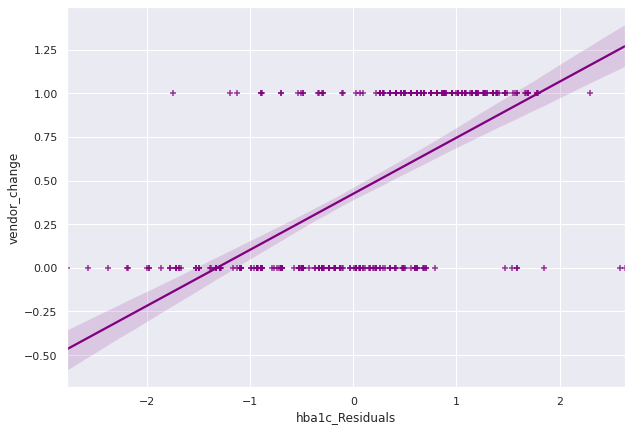

In [20]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=new_metadata['hba1c_Residuals'], y=new_metadata['vendor_change'], color='purple', marker='+')
fig.savefig('vendor_v_hba1c_residuals.png')

<AxesSubplot:xlabel='Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate', ylabel='Count'>

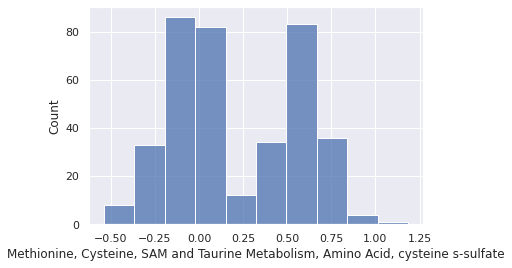

In [21]:
# normalizing the metabolomcs data using Chris's method of log transforming and then subtracting the mean

raw_cysteine = new_metadata['Methionine, Cysteine, SAM and Taurine Metabolism, Amino Acid, cysteine s-sulfate']
log_cysteine = np.log10(raw_cysteine)
sns.histplot(log_cysteine)

,corrected_cysteine,ARACHIDONIC ACID,CARBON DIOXIDE (CO2),"CHOLESTEROL, TOTAL","GFR, MDRD",INSULIN,OMEGA-6/OMEGA-3 RATIO,"Purine Metabolism, (Hypo)Xanthine/Inosine containing, Nucleotide, hypoxanthine","Glycolysis, Gluconeogenesis, and Pyruvate Metabolism, Carbohydrate, pyruvate","Gamma-glutamyl Amino Acid, Peptide, gamma-glutamyltyrosine",...,bacteria.firmicutes.bacilli.lactobacillales.aerococcaceae,bacteria.cyanobacteria.4c0d-2.ys2.unclassified,bacteria.cyanobacteria.chloroplast.streptophyta.unclassified,bacteria.tm7.tm7-3.ew055.unclassified,hba1c_Residuals,vendor1,t0,vendor2,t1,vendor_change
public_client_id,,,,,,,,,,,,,,,,,,,,,
01044249,-0.420301,9.8,22.0,183.0,105.0,13.4,10.3,1.871249,1.082681,0.966755,...,0.0,0.005320,0.000011,0.0,-0.305688,LCA,0,LCA,6,0
01045282,0.464552,7.3,24.0,188.0,86.0,6.0,12.3,2.361405,1.709739,0.884308,...,0.0,0.000100,0.000000,0.0,-0.106244,Quest,0,LCA,6,1
01054574,0.423620,10.4,22.0,175.0,75.0,5.0,7.3,0.744027,1.572209,1.145491,...,0.0,0.000380,0.000006,0.0,0.022194,Quest,0,LCA,6,1
01057221,-0.132716,9.2,22.0,251.0,81.0,6.8,10.8,2.939150,0.443290,0.977544,...,0.0,0.000000,0.000039,0.0,-0.501933,LCA,0,LCA,6,0
01058050,-0.115845,0.3,22.0,201.0,68.0,12.0,5.4,1.156264,0.811552,1.567686,...,0.0,0.000000,0.000009,0.0,1.390940,Quest,0,LCA,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01982074,-0.289372,11.5,21.0,196.0,77.0,15.5,8.6,1.217661,0.870681,0.653655,...,0.0,0.000105,0.000000,0.0,2.591682,LCA,0,LCA,6,0
01982352,-0.172313,7.0,27.0,157.0,77.0,17.1,10.6,1.050696,0.957028,1.610746,...,0.0,0.000188,0.000017,0.0,0.162129,LCA,0,LCA,6,0
01986408,-0.303351,10.0,25.0,201.0,98.0,6.8,11.3,1.434532,1.192093,0.596727,...,0.0,0.000190,0.000172,0.0,0.162129,LCA,0,LCA,6,0


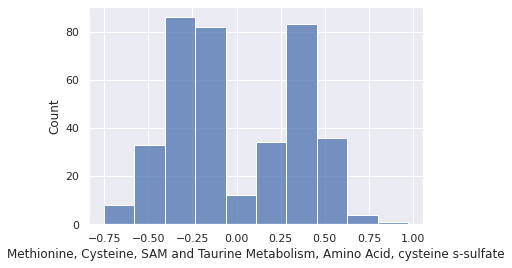

In [22]:
corrected_cysteine = log_cysteine - np.mean(log_cysteine)
sns.histplot(corrected_cysteine)

corrected_df = pd.DataFrame()
corrected_df['corrected_cysteine'] = corrected_cysteine
corrected_df = corrected_df.join(new_metadata)
corrected_df

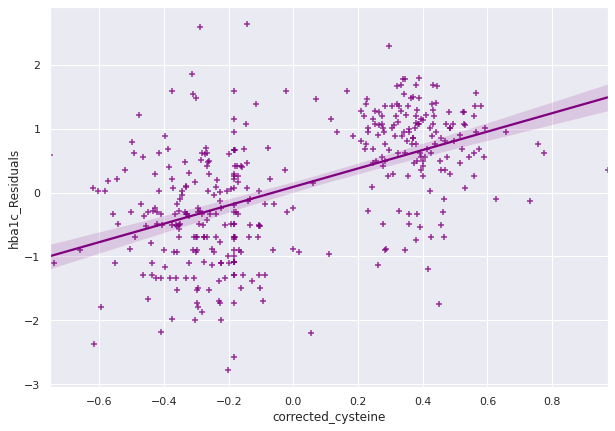

In [23]:
df_no_change = corrected_df[corrected_df['vendor_change'] == 0]
df_change = corrected_df[corrected_df['vendor_change'] == 1]

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=corrected_df['corrected_cysteine'], y=corrected_df['hba1c_Residuals'], color='purple', marker='+')
fig.savefig('corrected_cysteine_s-sulfate_v_hba1c_residuals.png')

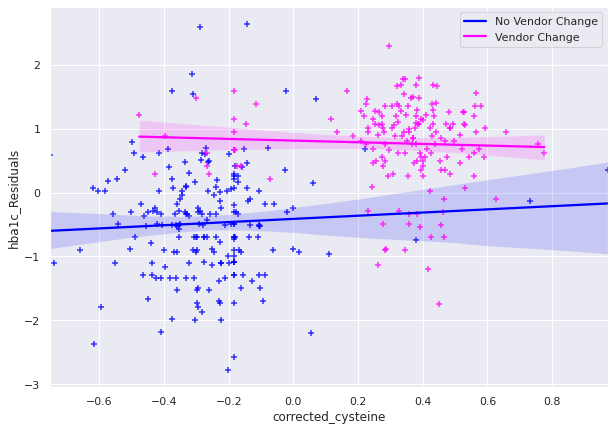

In [24]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_no_change['corrected_cysteine'], y=df_no_change['hba1c_Residuals'], color='blue', marker='+')
sns.regplot(x=df_change['corrected_cysteine'], y=df_change['hba1c_Residuals'], color='magenta', marker='+')
plt.legend(labels=['No Vendor Change', 'Vendor Change'])
fig.savefig('separated_corrected_cysteine_s-sulfate_v_hba1c_residuals.png')

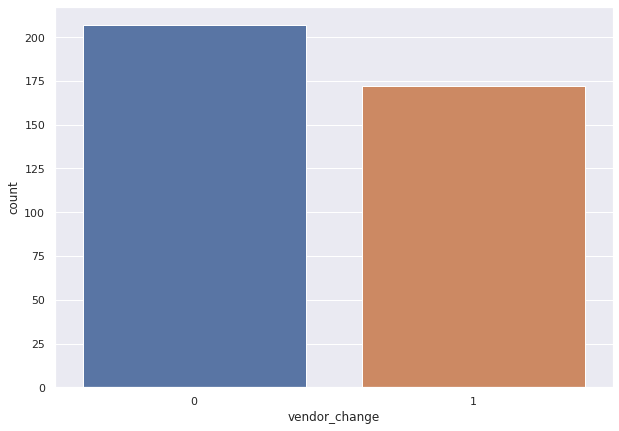

In [25]:
fig = plt.figure(figsize=(10, 7))
sns.countplot(x='vendor_change', data=new_metadata)
fig.savefig('vendor_changes.png')

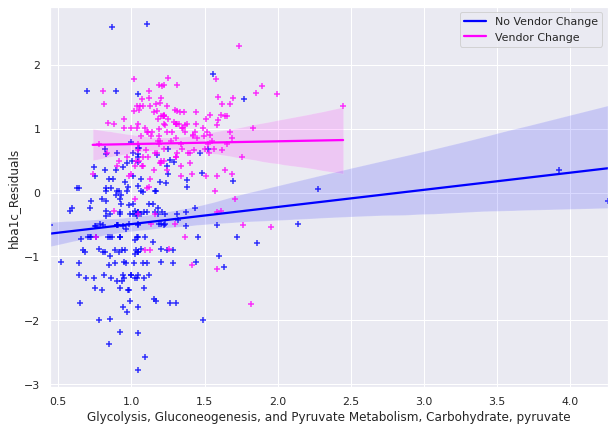

In [26]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_no_change['Glycolysis, Gluconeogenesis, and Pyruvate Metabolism, Carbohydrate, pyruvate'], y=df_no_change['hba1c_Residuals'], color='blue', marker='+')
sns.regplot(x=df_change['Glycolysis, Gluconeogenesis, and Pyruvate Metabolism, Carbohydrate, pyruvate'], y=df_change['hba1c_Residuals'], color='magenta', marker='+')
plt.legend(labels=['No Vendor Change', 'Vendor Change'])
fig.savefig('separated_pyruvate_v_hba1c_residuals.png')

In [27]:
x = new_metadata[['CVD3_P02786']]
y = new_metadata['hba1c_Residuals']

modelv1 = LinearRegression().fit(x, y)
scorev1 = modelv1.score(x, y)
print('r2 = ', scorev1, 'coef = ', modelv1.coef_, 'intercept = ', modelv1.intercept_)
r2 = 'r2 = ' + str(scorev1)
print(r2)

r2 =  0.16991339209604084 coef =  [-0.51820026] intercept =  3.4462705911065568
r2 = 0.16991339209604084


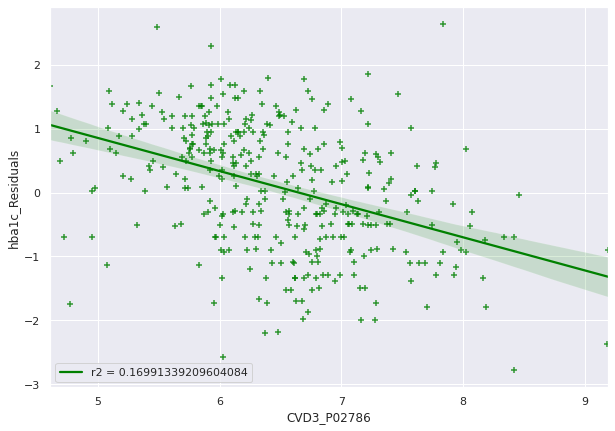

In [28]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=new_metadata['CVD3_P02786'], y=new_metadata['hba1c_Residuals'], color='green', marker='+')
plt.legend(labels=[r2])
fig.savefig('CVD_P02786_v_hba1c_residuals.png')

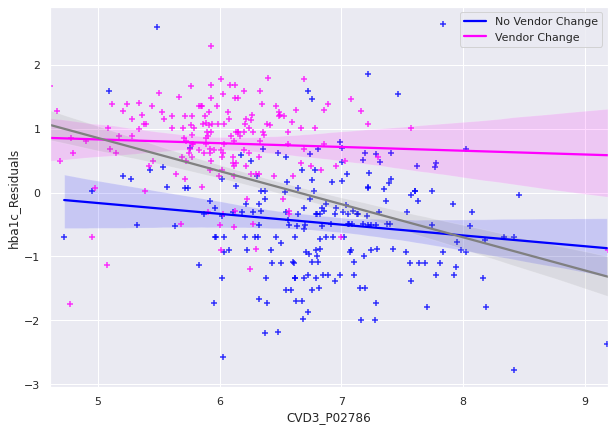

In [29]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_no_change['CVD3_P02786'], y=df_no_change['hba1c_Residuals'], color='blue', marker='+')
sns.regplot(x=df_change['CVD3_P02786'], y=df_change['hba1c_Residuals'], color='magenta', marker='+')
sns.regplot(x=new_metadata['CVD3_P02786'], y=new_metadata['hba1c_Residuals'], color='grey', marker='')
plt.legend(labels=['No Vendor Change', 'Vendor Change'])
fig.savefig('separated_CVD_P02786_v_hba1c_residuals.png')

In [30]:
x = new_metadata[['hba1c_Residuals']]
y = new_metadata['hba1c_Residuals']

model_fun = sm.OLS(x, y)
results_fun = model_fun.fit()
results_fun.params

hba1c_Residuals    1.0
dtype: float64

In [31]:
chem_coeffs = pd.read_csv('hba1c_chemistries_40_coefs.csv')
deltas_v_chem = pd.read_csv('hba1c_v_chemistries.csv')


chem_features = chem_coeffs['Unnamed: 0'].tolist()
deltas_v_chem_features = deltas_v_chem[['public_client_id','A/G RATIO','ARACHIDONIC ACID','BILIRUBIN, TOTAL','BUN/CREAT RATIO','CALCIUM','CARBON DIOXIDE (CO2)','CHLORIDE','CHOLESTEROL, TOTAL','EPA','GFR, MDRD','GLOBULIN','HOMA-IR','HOMOCYSTEINE, SERUM','INSULIN','LDL SMALL','LDL-CHOL CALCULATION','OMEGA-3 INDEX','OMEGA-6/OMEGA-3 RATIO','SODIUM','hba1c_Residuals']]
deltas_v_chem_features

,public_client_id,A/G RATIO,ARACHIDONIC ACID,"BILIRUBIN, TOTAL",BUN/CREAT RATIO,CALCIUM,CARBON DIOXIDE (CO2),CHLORIDE,"CHOLESTEROL, TOTAL",EPA,...,GLOBULIN,HOMA-IR,"HOMOCYSTEINE, SERUM",INSULIN,LDL SMALL,LDL-CHOL CALCULATION,OMEGA-3 INDEX,OMEGA-6/OMEGA-3 RATIO,SODIUM,hba1c_Residuals
0,01040480,1.5,8.6,0.4,17.0,8.8,21.0,102.0,151.0,0.3,...,2.6,2.123457,5.8,10.0,202.0,81.0,3.0,12.2,138.0,-1.981144
1,01044249,1.3,9.8,0.6,17.0,9.2,22.0,102.0,183.0,0.4,...,3.3,3.308642,13.8,13.4,780.0,116.0,3.8,10.3,140.0,-0.305688
2,01045282,1.8,7.3,0.7,14.0,9.5,24.0,106.0,188.0,0.5,...,2.5,1.585185,10.4,6.0,134.0,120.0,2.6,12.3,142.0,-0.106244
3,01048300,2.0,9.0,0.7,13.0,9.6,23.0,104.0,201.0,0.8,...,2.3,2.870370,6.9,12.5,920.0,129.0,4.2,8.9,142.0,-0.702865
4,01053354,1.6,8.3,1.2,24.0,9.8,27.0,98.0,176.0,3.0,...,2.9,0.915062,16.1,3.4,299.0,95.0,10.0,3.5,139.0,-2.336924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,HX591749,1.9,11.6,0.7,16.0,8.8,26.0,98.0,227.0,0.7,...,2.3,2.000000,8.3,8.1,460.0,139.0,3.7,10.6,139.0,0.417907
518,HX639632,1.8,12.8,0.6,14.0,9.3,24.0,101.0,167.0,0.4,...,2.7,2.109630,10.4,8.9,221.0,95.0,4.1,10.1,140.0,-0.330601
519,HX848290,1.9,8.8,0.5,22.0,9.3,24.0,98.0,263.0,0.8,...,2.4,0.840000,13.5,4.2,548.0,170.0,4.4,8.5,139.0,-0.295674
520,HX850312,2.0,11.5,0.8,11.0,9.6,25.0,100.0,183.0,1.1,...,2.2,1.415802,9.9,6.1,98.0,107.0,7.0,5.9,142.0,0.557809


In [32]:
# loop through selected features from chemistries and perform linear regression for each one against deltas

x = deltas_v_chem_features['hba1c_Residuals'].to_numpy()
x = np.array(x).reshape((-1,1))

chems_r2 = []

for i in range(deltas_v_chem_features.shape[1] - 2):
    model = LinearRegression().fit(x, deltas_v_chem_features.iloc[:, i+1])
    score = model.score(x, deltas_v_chem_features.iloc[:, i+1])
    
    chems_r2.append(score)
    
uni_reg_chem = pd.DataFrame()
features = list(deltas_v_chem_features.columns.values)

features_series = pd.Series(features[1:len(features) - 1])
r2_series = pd.Series(chems_r2)

uni_reg_chem['feature'] = features_series.values
uni_reg_chem['r2'] = r2_series.values

uni_reg_chem = uni_reg_chem.sort_values(by=['r2'], ascending=False)
uni_reg_chem.head(n=20)

,feature,r2
1,ARACHIDONIC ACID,0.094816
9,"GFR, MDRD",0.062577
14,LDL SMALL,0.051496
17,OMEGA-6/OMEGA-3 RATIO,0.046587
6,CHLORIDE,0.036508
16,OMEGA-3 INDEX,0.036155
12,"HOMOCYSTEINE, SERUM",0.031179
13,INSULIN,0.029224
2,"BILIRUBIN, TOTAL",0.026108
8,EPA,0.022496
